# Question 1
Import the data located at [this link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np

In [3]:
datos = pd.read_csv('../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, low_memory=False)
datos

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


# Question 2

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use [this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).


In [5]:
# Generate UBIGEO for Departments (first two digits)
datos['ubigeo_department'] = datos['Ubigeo'].str[:2]

# Generate UBIGEO for Provinces (first four digits)
datos['ubigeo_province'] = datos['Ubigeo'].str[:4]

# Question 3

In [7]:
datos['Casos'] = pd.to_numeric(datos['Casos'], errors='coerce').astype('Int64') 
datos.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_department,ubigeo_province
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172144 entries, 0 to 172143
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Año                172144 non-null  int64 
 1   Semana             172144 non-null  int64 
 2   Eventos o daños    172144 non-null  object
 3   Departamento       172144 non-null  object
 4   Distrito           172144 non-null  object
 5   Provincia          172144 non-null  object
 6   Ubigeo             172144 non-null  object
 7   Casos              166040 non-null  Int64 
 8   ubigeo_department  172144 non-null  object
 9   ubigeo_province    172144 non-null  object
dtypes: Int64(1), int64(2), object(7)
memory usage: 13.3+ MB


In [9]:
datos_2021 = datos.loc[datos.Año==2021]
datos_2021.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_department,ubigeo_province
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,<NA>,15,1501


In [10]:
datos_2021_anual = datos_2021.groupby('Ubigeo')['Casos'].sum().reset_index()
datos_2021_anual

,Ubigeo,Casos
0,010101,0
1,010201,474
2,010202,25
3,010203,38
4,010204,8
...,...,...
464,250302,26
465,250303,32
466,250304,14
467,250305,2


In [11]:
shpf1 = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )

In [12]:
shpf1 = shpf1[['UBIGEO', 'geometry']]
shpf1

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [13]:
shpf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
shpf1.head(3), datos_2021_anual.head(3)

(   UBIGEO                                           geometry
 0  060504  POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...
 1  061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...
 2  061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...,
    Ubigeo  Casos
 0  010101      0
 1  010201    474
 2  010202     25)

In [15]:
shpf1.info(), datos_2021_anual.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   UBIGEO    1874 non-null   object  
 1   geometry  1874 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 29.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ubigeo  469 non-null    object
 1   Casos   469 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 7.9+ KB


(None, None)

In [16]:
datos_map1 = pd.merge(shpf1, datos_2021_anual, how="left", left_on="UBIGEO", right_on="Ubigeo")
datos_map1

,UBIGEO,geometry,Ubigeo,Casos
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...",NaN,<NA>
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,<NA>
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,<NA>
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,<NA>
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,<NA>
...,...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN,<NA>
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250...",NaN,<NA>
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN,<NA>
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN,<NA>


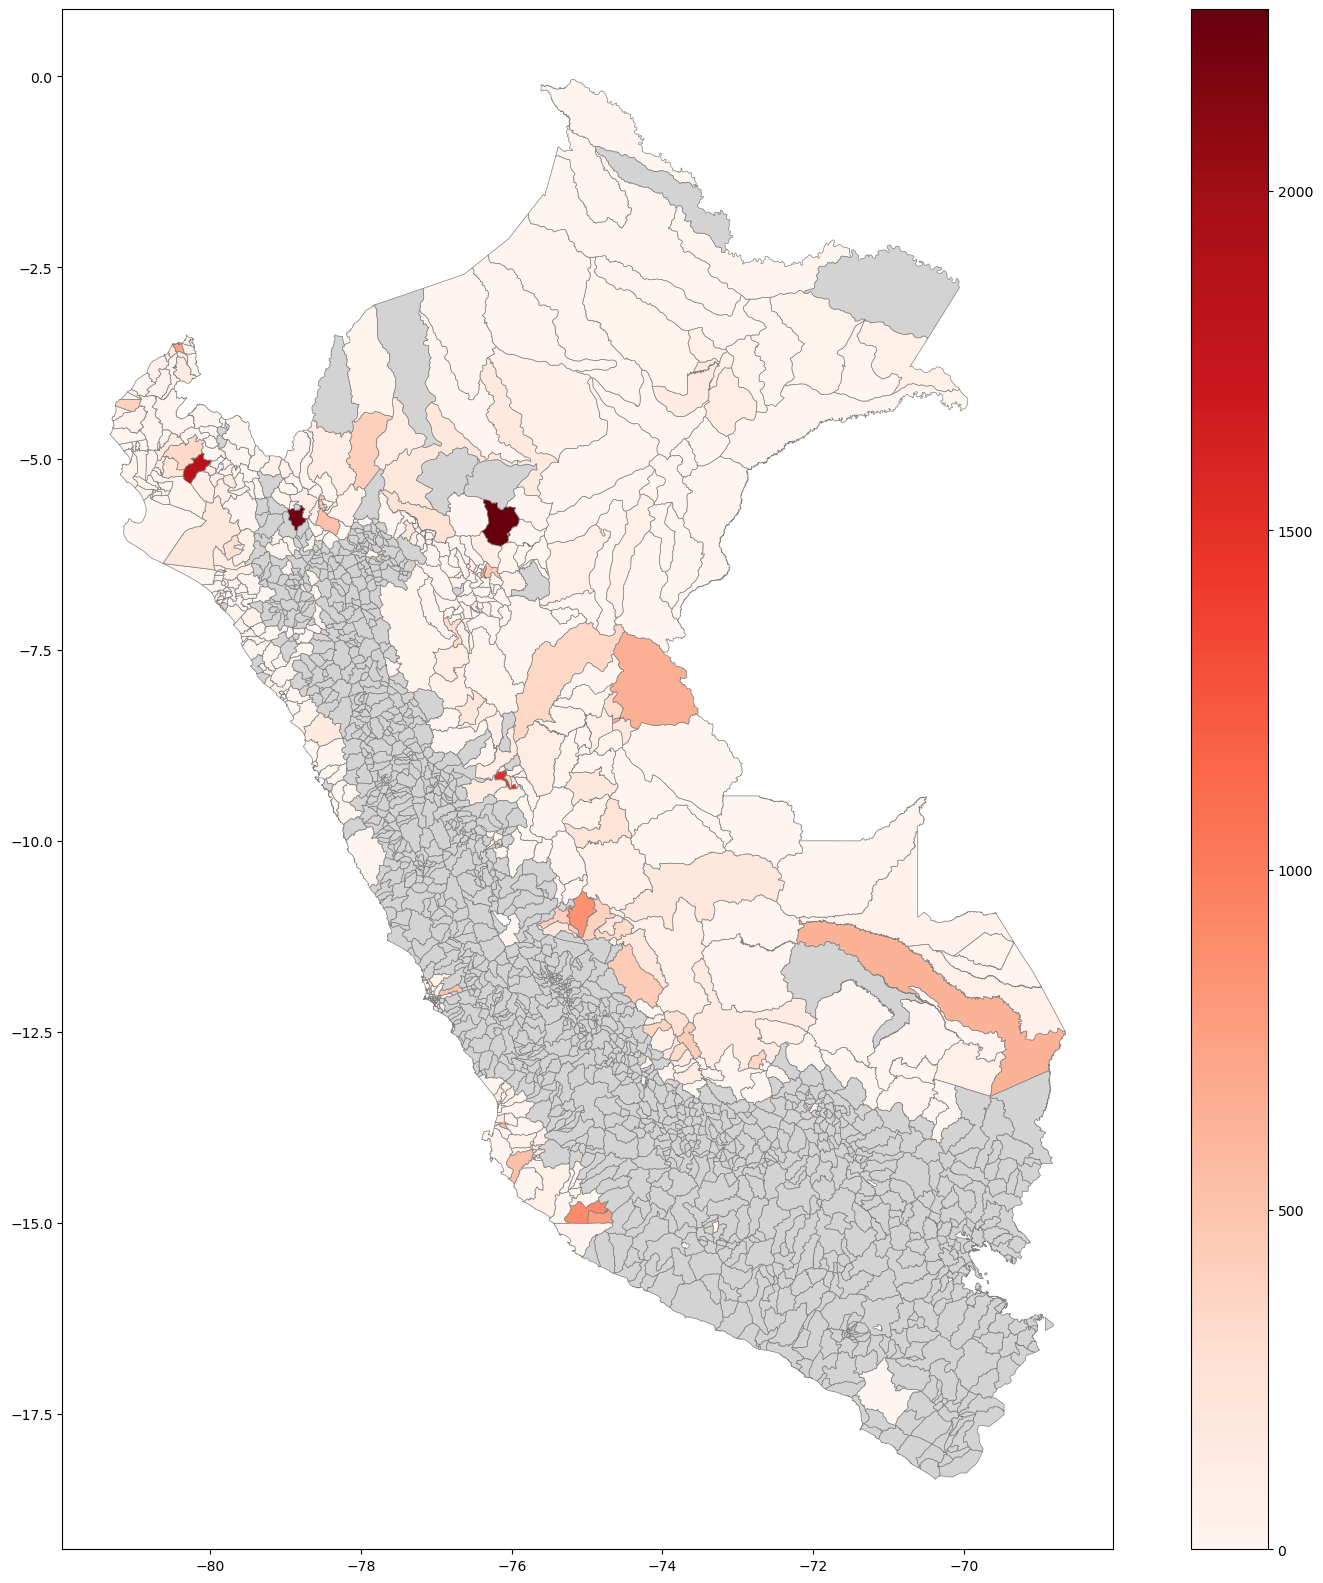

In [17]:
import matplotlib.pyplot as plt
color_nan = 'lightgrey'

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 20))

# Graficar con los colores deseados
datos_map1.plot(column='Casos', cmap='Reds', 
                edgecolor='gray', 
                linewidth=0.5,
                ax=ax,
                legend=True)

# Agregar el color para los NaN
nan_mask = datos_map1['Casos'].isna()
datos_map1[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

plt.show()

# Question 4

Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [19]:
datos_2021_provincial = datos_2021.groupby('ubigeo_province')['Casos'].sum().reset_index()
datos_2021_provincial

,ubigeo_province,Casos
0,0101,0
1,0102,676
2,0103,0
3,0104,435
4,0107,719
...,...,...
87,2403,72
88,2501,1241
89,2502,179
90,2503,193


In [20]:
shpf1['UBIGEO_Prov'] = shpf1['UBIGEO'].str[:4]
shpf1_provincial = shpf1.dissolve(by='UBIGEO_Prov')

In [21]:
shpf1_provincial.head(3), datos_2021_provincial.head(3)

(                                                      geometry  UBIGEO
 UBIGEO_Prov                                                           
 0101         POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...  010106
 0102         POLYGON ((-78.3262 -5.56382, -78.32625 -5.5652...  010204
 0103         POLYGON ((-77.9378 -6.03777, -77.93781 -6.0377...  010311,
   ubigeo_province  Casos
 0            0101      0
 1            0102    676
 2            0103      0)

In [22]:
shpf1_provincial.info(), datos_2021_provincial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 196 entries, 0101 to 2504
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  196 non-null    geometry
 1   UBIGEO    196 non-null    object  
dtypes: geometry(1), object(1)
memory usage: 4.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ubigeo_province  92 non-null     object
 1   Casos            92 non-null     Int64 
dtypes: Int64(1), object(1)
memory usage: 1.7+ KB


(None, None)

<Axes: >

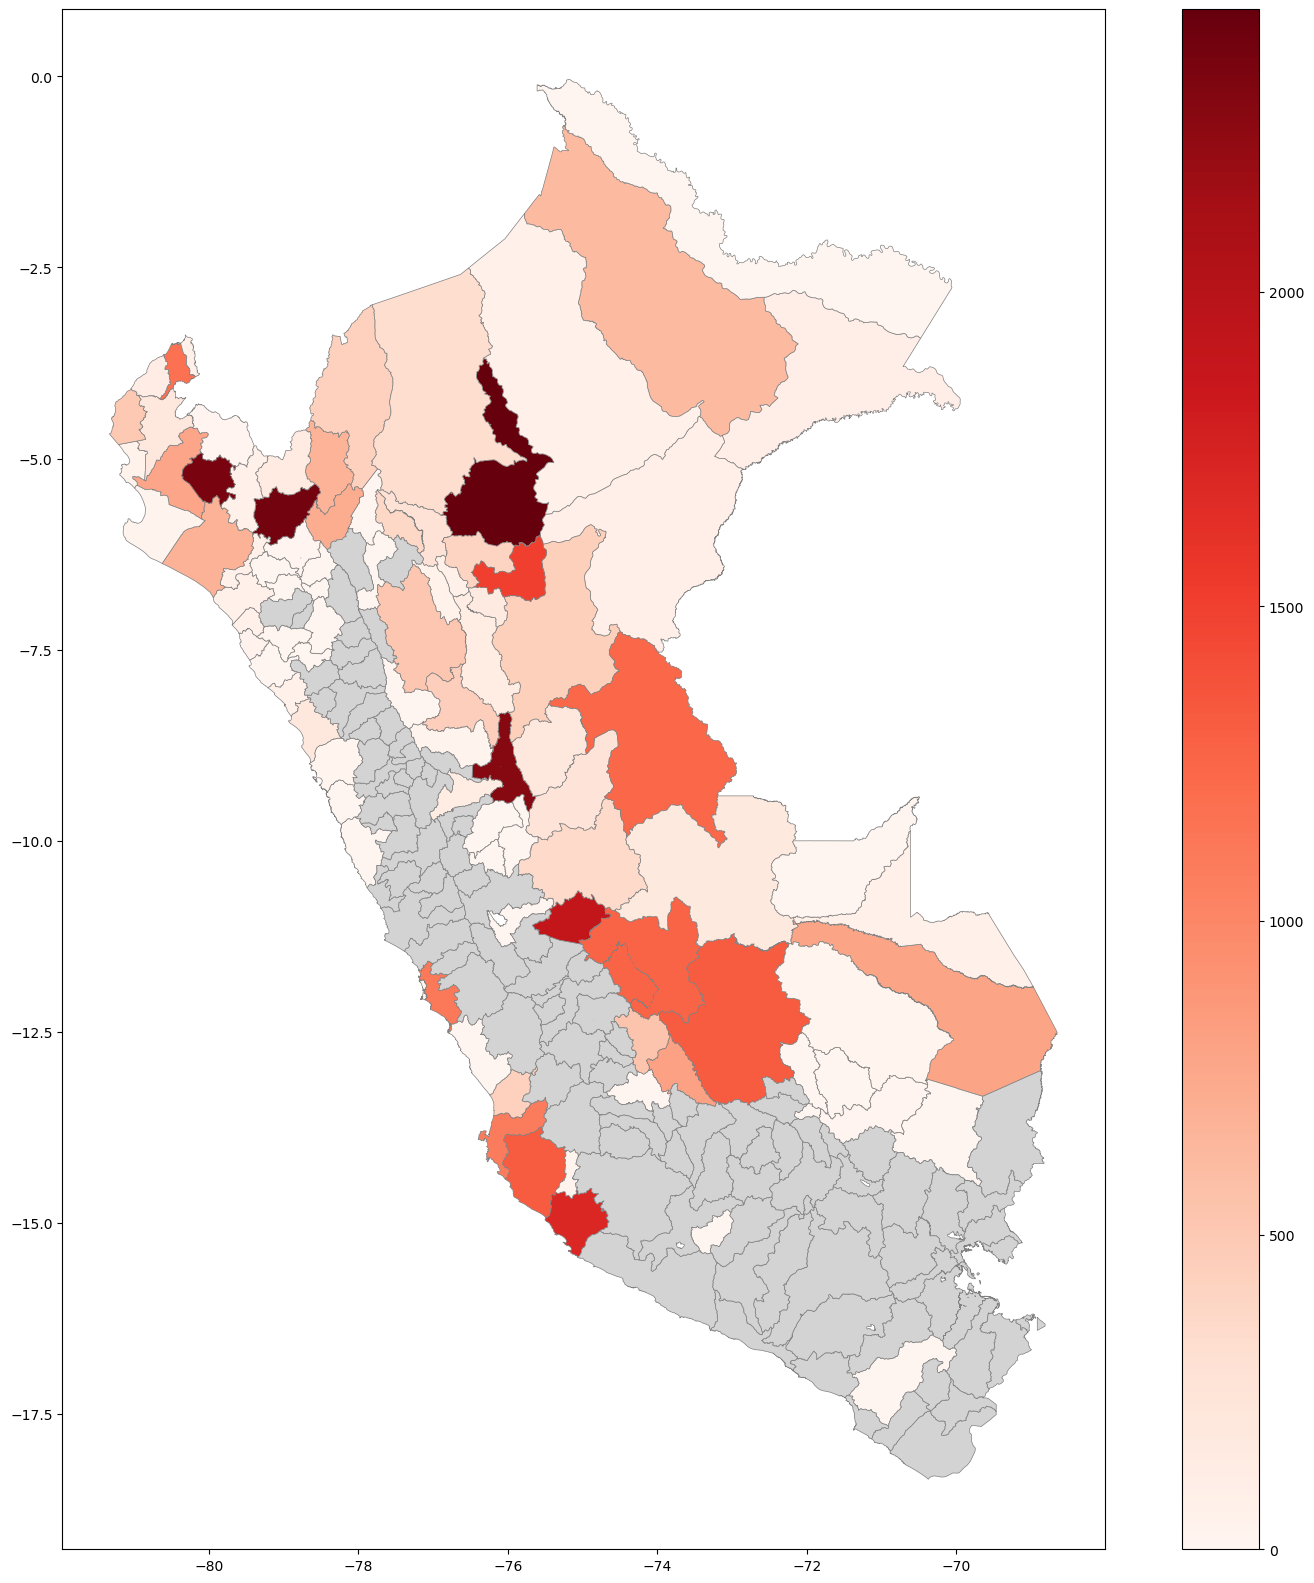

In [23]:
datos_map_prov = pd.merge(shpf1_provincial, datos_2021_provincial, how="left", left_on="UBIGEO_Prov", right_on="ubigeo_province")

# Define the color for NaN values
color_nan = 'lightgrey'

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot with the desired colormap
datos_map_prov.plot(column='Casos', cmap='Reds', 
                    edgecolor='gray', 
                    linewidth=0.5,
                    ax=ax,
                    legend=True)

# Plot the NaN values with the specified color
nan_mask = datos_map_prov['Casos'].isna()
datos_map_prov[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

# Question 5

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.


In [25]:
datos_departamental = datos.groupby(['Año', 'ubigeo_department'])['Casos'].sum().reset_index()

In [26]:
shpf1['UBIGEO_Dept'] = shpf1['UBIGEO'].str[:2]
shpf1_departamental = shpf1.dissolve(by='UBIGEO_Dept')
unique_years = datos_departamental['Año'].unique()
unique_years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

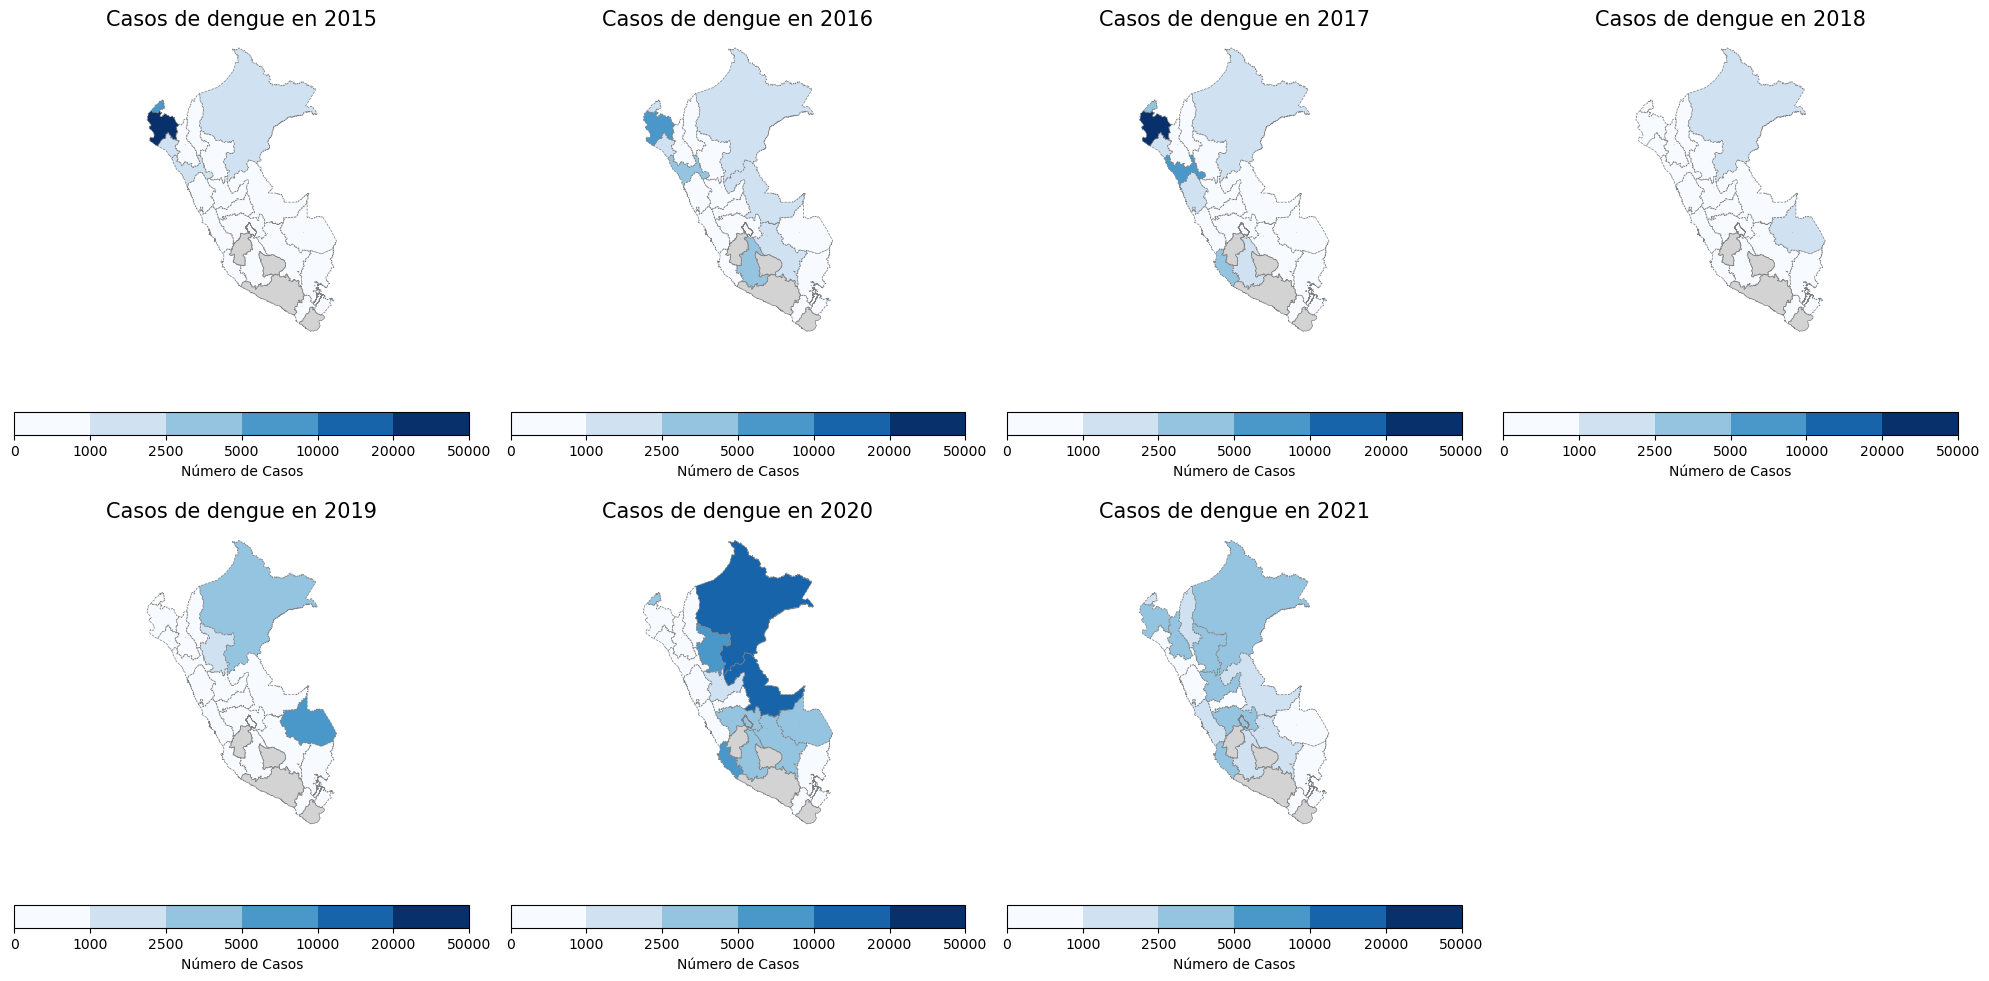

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # 2 filas, 4 columnas

for i, year in enumerate(unique_years):
    ax = axes.flatten()[i]  # Asegura que se use el índice correcto en la cuadrícula
    datos_year = datos_departamental[datos_departamental['Año'] == year]
    
    # Merge de los datos del año con el shapefile
    datos_map_dept = pd.merge(shpf1_departamental, datos_year, how="left", left_on="UBIGEO_Dept", right_on="ubigeo_department")

    # Definir el colormap y el norm para una escala discreta
    bins = [0, 1000, 2500, 5000, 10000, 20000, 50000]
    cmap = plt.get_cmap('Blues', len(bins)-1)  # Usar el colormap con el número de bins
    norm = BoundaryNorm(boundaries=bins, ncolors=len(bins)-1)
   
    # Plotear los datos
    datos_map_dept.plot(ax = ax,
                        column = 'Casos', 
                        edgecolor ='gray', 
                        linewidth =0.5,
                        linestyle = '--',
                        legend = True,
                        cmap   = cmap, 
                        norm   = norm,  # Aplicar la normalización común
                        classification_kwds = dict(bins = [0, 1000, 2500, 5000, 10000, 20000, np.inf]),
                        legend_kwds={
                            'label': "Número de Casos",
                            'orientation': "horizontal"
                        })
    
    # Indicar el color de los valores NaN
    nan_mask = datos_map_dept['Casos'].isna()
    datos_map_dept[nan_mask].plot(ax=ax, color='lightgrey', edgecolor='gray', linewidth=0.5, legend=False)
    
    # Configurar el título
    ax.set_title(f'Casos de dengue en {year}', fontsize=15)
    ax.axis('off')  # Opcional: quitar los ejes

# borra ultimo lienzo
if len(unique_years) < 8:
    for j in range(len(unique_years), 8):
        fig.delaxes(axes.flatten()[j])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Question 6
Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.


In [29]:
datos_2021 = datos_2021.copy()
datos_2021.loc[:, 'Trimestre'] = (datos_2021['Semana'] - 1) // 13 + 1
datos_2021.loc[:,'Trimestre']  = datos_2021['Trimestre'].replace(5, 4)
datos_2021.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_department,ubigeo_province,Trimestre
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801,4
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801,4
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,<NA>,15,1501,4


In [30]:
datos_trimestral = datos_2021.groupby(['Trimestre', 'ubigeo_department'])['Casos'].sum().reset_index()
unique_trimesters = datos_trimestral['Trimestre'].unique()
unique_trimesters

array([1, 2, 3, 4], dtype=int64)

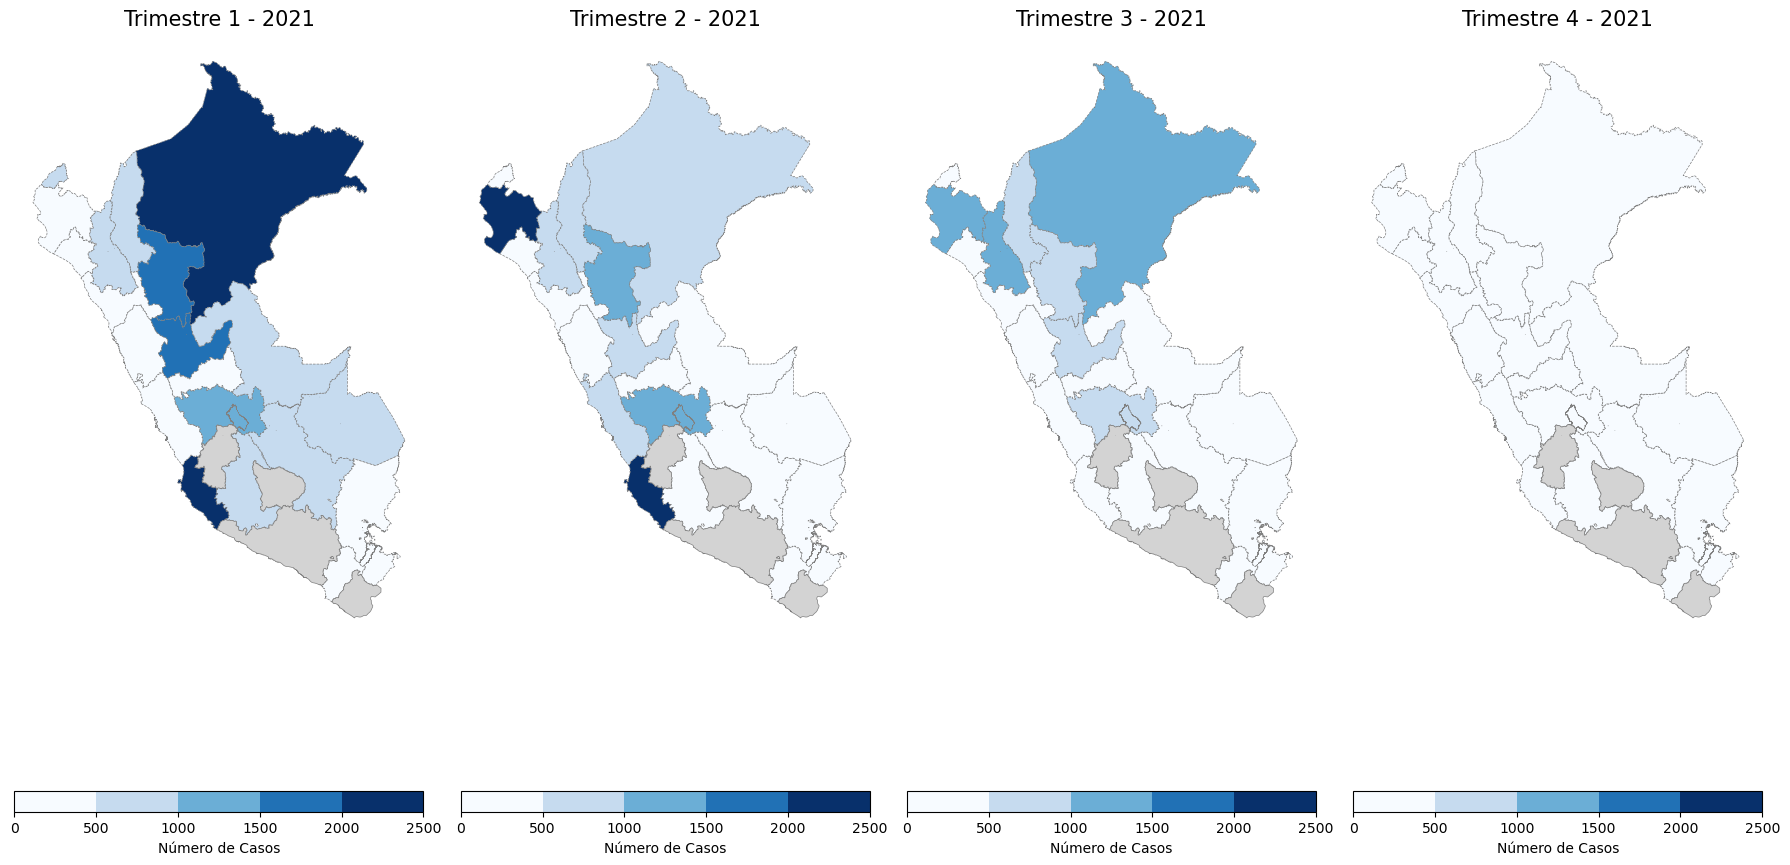

In [31]:
# Paso 4: Crear subplots en una cuadrícula de 2 filas y 2 columnas (uno para cada trimestre)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 10))  # 2 filas, 2 columnas

# Paso 5: Definir la escala de colores categórica
bins = [0, 500, 1000, 1500, 2000, 2500]
cmap = plt.get_cmap('Blues', len(bins)-1)
norm = BoundaryNorm(boundaries=bins, ncolors=len(bins)-1)

for i, trimestre in enumerate(unique_trimesters):
    ax = axes.flatten()[i]  # Asegura que se use el índice correcto en la cuadrícula
    datos_trimestre = datos_trimestral[datos_trimestral['Trimestre'] == trimestre]
    
    # Merge de los datos del trimestre con el shapefile
    datos_map_dept = pd.merge(shpf1_departamental, datos_trimestre, how="left", left_on="UBIGEO_Dept", right_on="ubigeo_department")
    
    # Plotear los datos
    datos_map_dept.plot(ax=ax,
                        column='Casos',
                        cmap=cmap,
                        norm=norm,
                        edgecolor='gray',
                        linewidth=0.5,
                        linestyle='--',
                        legend=True,
                        classification_kwds=dict(bins=bins),
                        legend_kwds={
                            'label': "Número de Casos",
                            'orientation': "horizontal"
                        })
    
    # Indicar el color de los valores NaN
    nan_mask = datos_map_dept['Casos'].isna()
    datos_map_dept[nan_mask].plot(ax=ax, color='lightgrey', edgecolor='gray', linewidth=0.5, legend=False)
    
    # Configurar el título
    ax.set_title(f'Trimestre {trimestre} - 2021', fontsize=15)
    ax.axis('off')  

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()